Importing Python Packages

In [ ]:
!pip install -q gradio

In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
data = pd.read_csv("train.csv")
data = data.dropna()

Information about the columns

In [ ]:
print(data.info())

Let's have a look if the Dataset have any null values

In [ ]:
print(data.isnull().sum())

Credit Score column values

In [ ]:
data["Credit_Score"].value_counts()

## The Dataset has many features that can train a Machine Learning model for Credit Score Classification.

Credit Score VS Annual Income

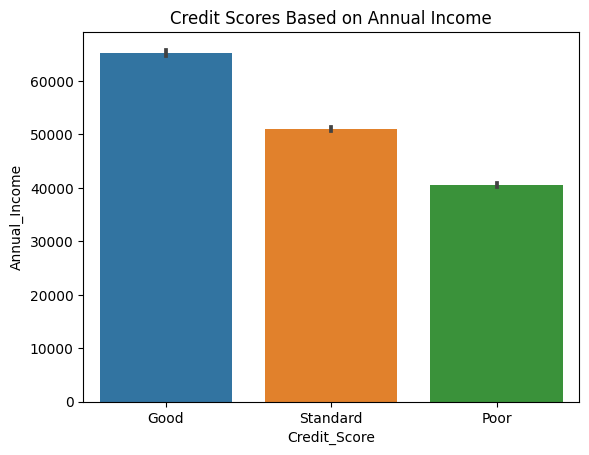

In [ ]:

import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
sb.barplot(data,x="Credit_Score", y="Annual_Income")
plt.title("Credit Scores Based on Annual Income")
plt.show()


Credit Score VS Monthly Inhand Salary

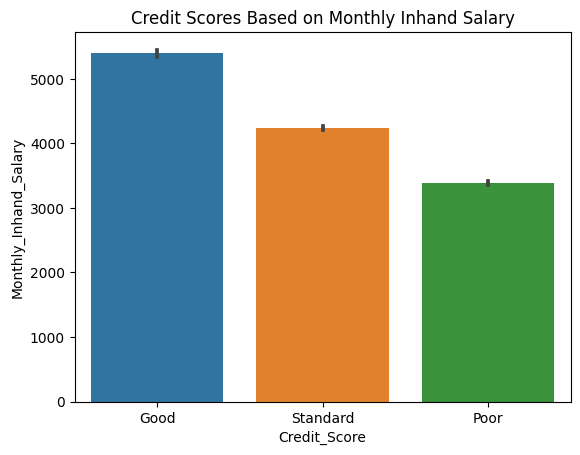

In [ ]:
sb.barplot(data,x="Credit_Score", y="Monthly_Inhand_Salary")
plt.title("Credit Scores Based on Monthly Inhand Salary")
plt.show()

Credit Score VS Number of Bank Accounts

In [ ]:
print(data.isnull().sum())

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


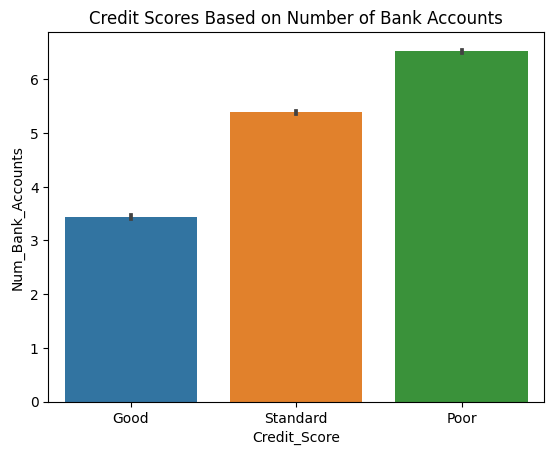

In [ ]:
sb.barplot(data,x="Credit_Score", y="Num_Bank_Accounts")
plt.title("Credit Scores Based on Number of Bank Accounts")
plt.show()

Credit Score VS Number of Credit Cards

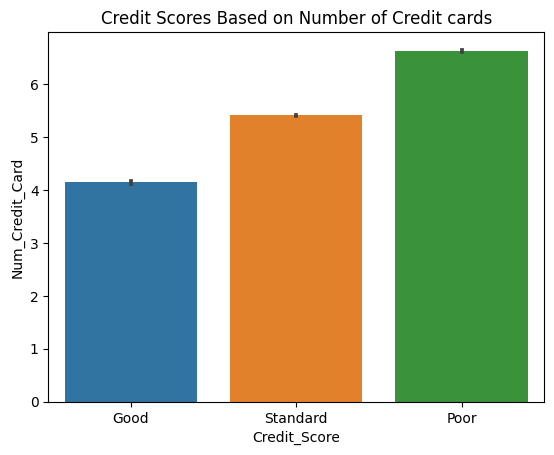

In [ ]:
sb.barplot(data,x="Credit_Score", y="Num_Credit_Card")
plt.title("Credit Scores Based on Number of Credit cards")
plt.show()

Credit Scores VS Average Interest rates

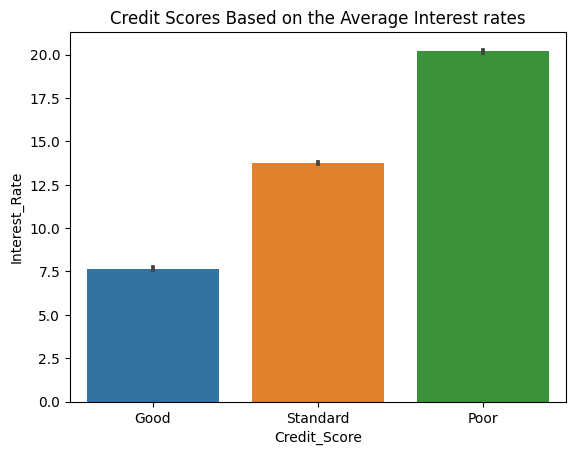

In [ ]:
sb.barplot(data,x="Credit_Score", y="Interest_Rate")
plt.title("Credit Scores Based on the Average Interest rates")
plt.show()


Credit Scores VS  Number of Loans Taken by the Person

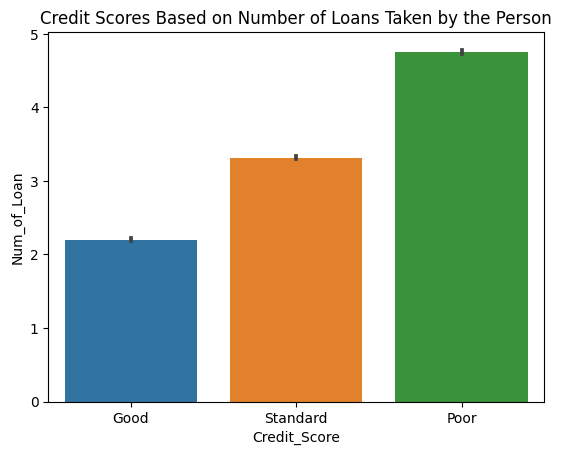

In [ ]:
sb.barplot(data,x="Credit_Score", y="Num_of_Loan")
plt.title("Credit Scores Based on Number of Loans Taken by the Person")
plt.show()


Credit Scores VS Average Number of Days Delayed for Credit card Payments

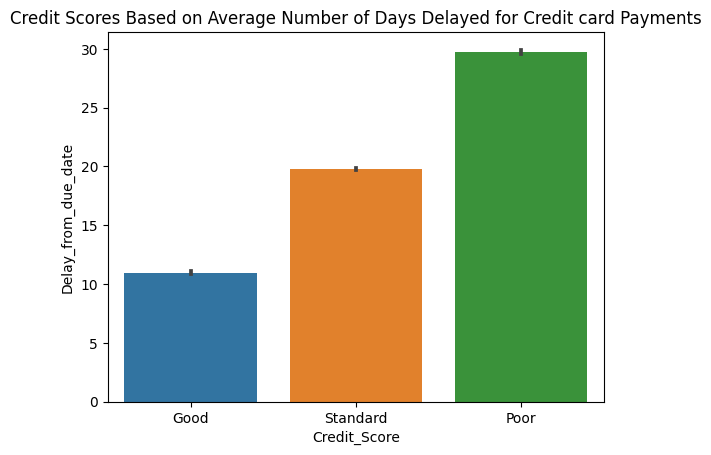

In [ ]:
sb.barplot(data,x="Credit_Score", y="Delay_from_due_date")
plt.title("Credit Scores Based on Average Number of Days Delayed for Credit card Payments")
plt.show()


Credit Scores VS Number of Delayed Payments

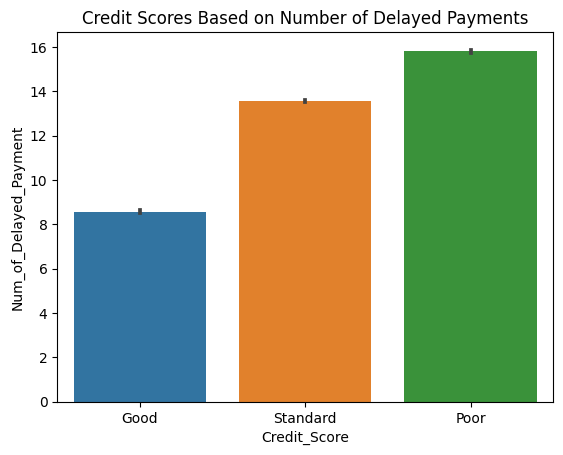

In [ ]:
sb.barplot(data,x="Credit_Score", y="Num_of_Delayed_Payment")
plt.title("Credit Scores Based on Number of Delayed Payments")
plt.show()


Credit Scores VS Outstanding Debt

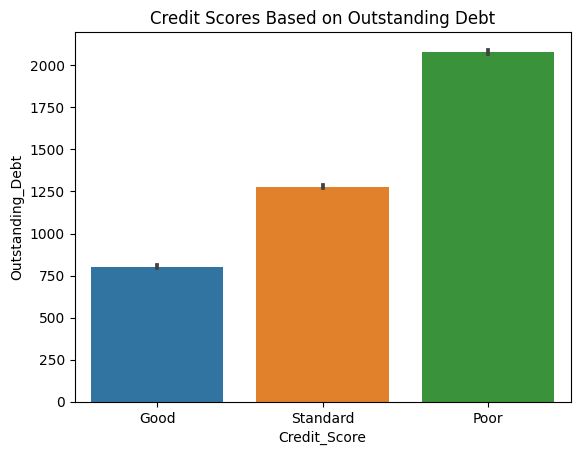

In [ ]:
sb.barplot(data,x="Credit_Score", y="Outstanding_Debt")
plt.title("Credit Scores Based on Outstanding Debt")
plt.show()


Credit Scores VS Credit Utilization Ratio

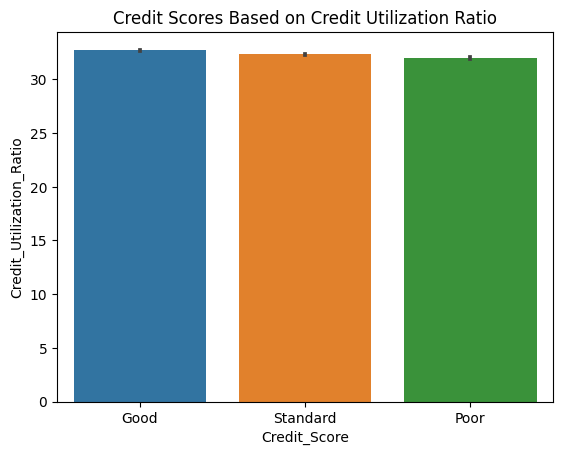

In [ ]:
sb.barplot(data,x="Credit_Score", y="Credit_Utilization_Ratio")
plt.title("Credit Scores Based on Credit Utilization Ratio")
plt.show()


Credit Score VS Credit History Age

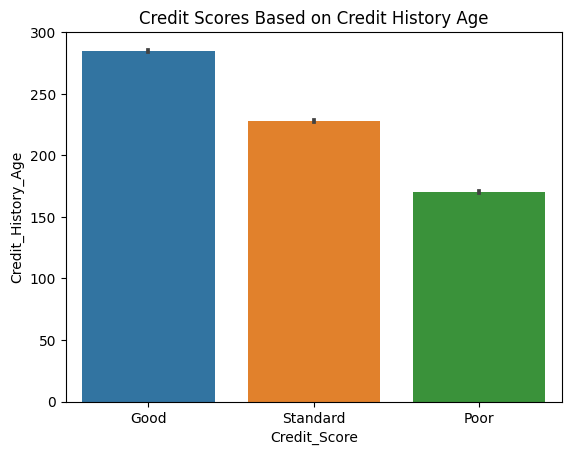

In [ ]:
sb.barplot(data,x="Credit_Score", y="Credit_History_Age")
plt.title("Credit Scores Based on Credit History Age")
plt.show()


Credit Scores VS Total Number of EMIs per Month

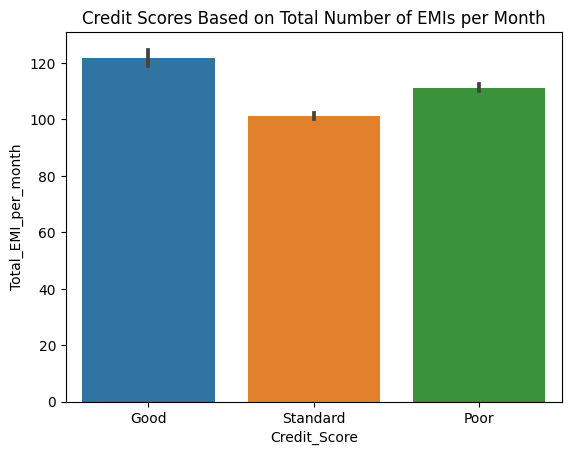

In [ ]:
sb.barplot(data,x="Credit_Score", y="Total_EMI_per_month")
plt.title("Credit Scores Based on Total Number of EMIs per Month")
plt.show()


Credit Scores VS Amount Invested Monthly

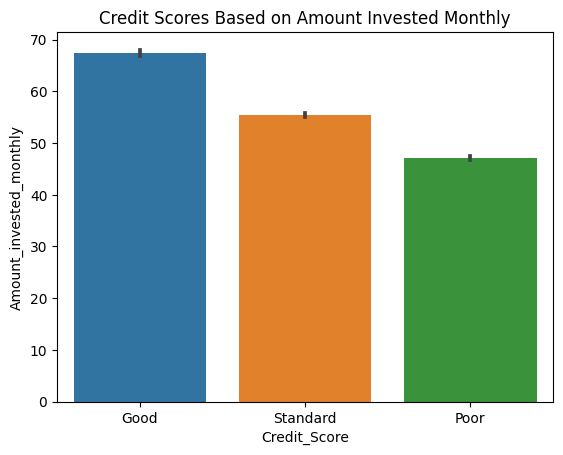

In [ ]:
sb.barplot(data,x="Credit_Score", y="Amount_invested_monthly")
plt.title("Credit Scores Based on Amount Invested Monthly")
plt.show()


Credit Scores VS Monthly Balance Left

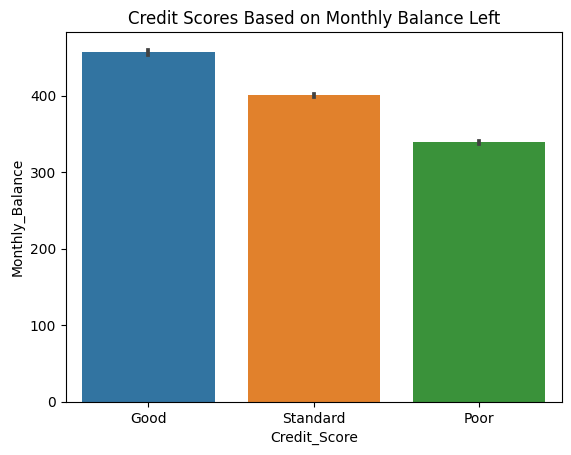

In [ ]:
sb.barplot(data,x="Credit_Score", y="Monthly_Balance")
plt.title("Credit Scores Based on Monthly Balance Left")
plt.show()


In [ ]:
data["Credit_Mix"] = data["Credit_Mix"].map({"Standard": 1, 
                               "Good": 2, 
                               "Poor": 0})

In [ ]:
data = data.dropna()


In [ ]:
from sklearn.model_selection import train_test_split
x = np.array(data[["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Credit_Mix", "Outstanding_Debt", 
                   "Credit_History_Age", "Monthly_Balance"]])
y = np.array(data[["Credit_Score"]])

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                    test_size=0.33, 
                                                    random_state=42)


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
mdl1 = LogisticRegression()
mdl1.fit(xtrain,ytrain)
print("LogisticAccuracy = ",metrics.accuracy_score(ytest,mdl1.predict(xtest)))

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
prediction_test = model.predict(xtest)
print("RandomForestAcuuracy = " ,metrics.accuracy_score(ytest,prediction_test))

from sklearn import tree 
mdl = tree.DecisionTreeClassifier()
mdl.fit(xtrain,ytrain)
print("DecisionTreeAccuracy = ",metrics.accuracy_score(ytest,mdl.predict(xtest)))

lis ={"logistic":LogisticRegression(),"RandomForest":RandomForestClassifier(),"DecisionTree":tree.DecisionTreeClassifier()}
tple = lis.items()
for name,model in tple:
  y_prediction = model.fit(xtrain,ytrain)
  print(name+"Accuracy =",metrics.accuracy_score(ytest,model.predict(xtest)))


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticAccuracy =  0.6081408753030966


<ipython-input-24-3d1732fbae28>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)


RandomForestAcuuracy =  0.8073299678022021
DecisionTreeAccuracy =  0.7571650037762849


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-24-3d1732fbae28>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_prediction = model.fit(xtrain,ytr

logisticAccuracy = 0.6081408753030966
RandomForestAccuracy = 0.8083634773621656
DecisionTreeAccuracy = 0.7570457526732123


In [ ]:
print("Credit Score Prediction : ")
a = float(input("Annual Income: "))
b = float(input("Monthly Inhand Salary: "))
c = float(input("Number of Bank Accounts: "))
d = float(input("Number of Credit cards: "))
e = float(input("Interest rate: "))
f = float(input("Number of Loans: "))
g = float(input("Average number of days delayed by the person: "))
h = float(input("Number of delayed payments: "))
i = input("Credit Mix (Bad: 0, Standard: 1, Good: 2) : ")
j = float(input("Outstanding Debt: "))
k = float(input("Credit History Age: "))
l = float(input("Monthly Balance: "))

features = np.array([[a, b, c, d, e, f, g, h, i, j, k, l]])
print("Predicted Credit Score = ", model.predict(features))


        

Credit Score Prediction : 
